In [1]:
# Import libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading and preprocessing the file (removing the Null values)
f_data = pd.read_csv("penguins.csv")

In [3]:
print(f_data)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0  

In [4]:
# Determine the sum of missing entries
m_sum = f_data.isnull().sum()
print("Sum of missing entries from each column:")
print(m_sum)

Sum of missing entries from each column:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [5]:
# Missing value fill up in each column
f_data = f_data.fillna(f_data.mode().iloc[0])
print(f_data)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen            41.1           17.0              190.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0  

In [6]:
# Description of statistics
print(f_data.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      344.000000     344.000000         344.000000   344.000000   
mean        43.905523      17.150291         200.851744  4199.418605   
std          5.447882       1.969061          14.045266   800.197923   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.275000      15.600000         190.000000  3550.000000   
50%         44.250000      17.300000         197.000000  4025.000000   
75%         48.500000      18.700000         213.000000  4750.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   344.000000  
mean   2008.029070  
std       0.818356  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000  


In [7]:
# Convert features with string datatype to categorical 
species = {'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2}
island = {'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}
sex = {'male': 0, 'female': 1}

f_data['species'] = f_data['species'].map(species)
f_data['island'] = f_data['island'].map(island)
f_data['sex'] = f_data['sex'].map(sex)

In [8]:
# Normalize non-categorical features
def normalizing(column):
    maximum_value = column.max()
    minimum_value = column.min()
    a = column - minimum_value
    b = maximum_value - minimum_value
    column = a / b
    return column

In [9]:
# Passing the features to the normalizing function 
f_data = f_data.drop(['year'], axis=1)
f_data['bill_length_mm'] = normalizing(f_data["bill_length_mm"])
f_data['bill_depth_mm'] = normalizing(f_data["bill_depth_mm"])
f_data['flipper_length_mm'] = normalizing(f_data["flipper_length_mm"])
f_data['body_mass_g'] = normalizing(f_data["body_mass_g"])

In [10]:
#Choose your attribute and target abd data matrix
X = f_data.drop('sex', axis=1).values
y = f_data['sex'].values

datasample = len(f_data)
train_data = int(datasample * 0.8)
test_data = datasample - train_data

X_train = X[:train_data]
y_train = y[:train_data]
X_test = X[train_data:]
y_test = y[train_data:]

In [11]:
# Print the shape of X_train, y_train, X_test, y_test

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (275, 6)
y_train shape: (275,)
X_test shape: (69, 6)
y_test shape: (69,)


In [19]:
# Define Logistic Regression class 
class LogitRegression():
    
    def __init__(self, learning_rate, iterations_num):
        self.learning_rate = learning_rate
        self.iterations_num = iterations_num
        
    def fit(self, X, y):
        self.N, self.d = X.shape
        self.weights = np.random.uniform(0, 1, self.d)
        self.bias = 0
        self.loss = []
        self.accuracy = []
        for i in range(self.iterations_num):
            grad_w, grad_b = self.gradient_descent(X, y)
            self.weights -= self.learning_rate * grad_w
            self.bias -= self.learning_rate * grad_b
            loss = self.cost(X, y)
            self.loss.append(loss)
            accuracy = self.evaluate(X, y)
            self.accuracy.append(accuracy)
            if i % 10000 == 0:
                print("Iteration : {}".format(i))
                print("Loss = {}".format(loss))
                print("Accuracy = {}%".format(accuracy))
                
    def sigmoid(self, z):
        return 1.0 / (1 + np.exp(-z))
    
    def cost(self, X, y):
        z = np.dot(X, self.weights) + self.bias
        p = self.sigmoid(z)
        return (-1/self.N) * np.sum(y*np.log(p) + (1-y)*np.log(1-p))
    
    def gradient_descent(self, X, y):
        z = np.dot(X, self.weights) + self.bias
        p = self.sigmoid(z)
        grad_w = np.dot(X.T, (p - y)) / self.N
        grad_b = np.sum(p - y) / self.N
        return grad_w, grad_b
                 
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_hat = self.sigmoid(z)
        y_hat_labels = [1 if pr >= 0.5 else 0 for pr in y_hat]
        return y_hat_labels
    
    def evaluate(self, X, y):
        y_predict = self.predict(X)
        accuracy = np.mean(y_predict == y) * 100
        return accuracy
    
    def picklefile_save(self, filename):
        with open(filename, 'wb') as file:
            pickle.dump({'weights': self.weights, 'bias': self.bias}, file)
    
    def plot_loss_graph(self):
        plt.plot(self.loss)
        plt.title("Loss vs. Iterations Number")
        plt.xlabel("Number of Iteration")
        plt.ylabel("Loss Value")
        plt.show()
            

Iteration : 0
Loss = 1.05406716429418
Accuracy = 47.63636363636364%
Iteration : 10000
Loss = 0.6626937816343361
Accuracy = 61.09090909090909%
Iteration : 20000
Loss = 0.634232343147699
Accuracy = 66.9090909090909%
Iteration : 30000
Loss = 0.609513329667802
Accuracy = 72.36363636363636%
Iteration : 40000
Loss = 0.587481438294735
Accuracy = 77.0909090909091%
Iteration : 50000
Loss = 0.5677074642918594
Accuracy = 80.36363636363636%
Iteration : 60000
Loss = 0.5498956797113541
Accuracy = 82.18181818181817%
Iteration : 70000
Loss = 0.5338035470335867
Accuracy = 84.36363636363636%
Iteration : 80000
Loss = 0.5192234578281429
Accuracy = 85.0909090909091%
Iteration : 90000
Loss = 0.5059757921080623
Accuracy = 85.45454545454545%


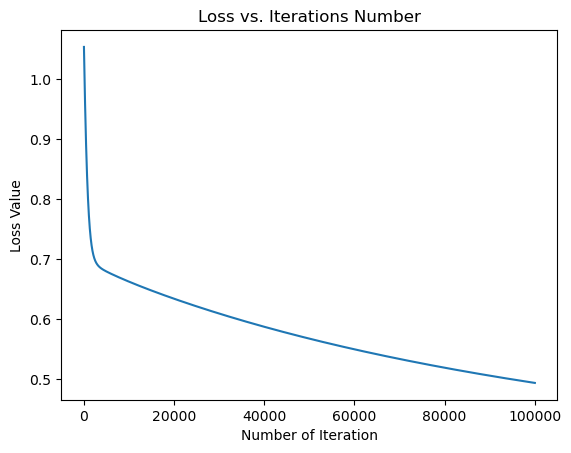

In [20]:
# Presenting the output
model = LogitRegression(learning_rate = 1e-3, iterations_num = 100000)
model.fit(X_train,y_train)
model.predict(X_train)
model.picklefile_save('Paul_Anip_logistic_regression.pkl')
model.plot_loss_graph()

Iteration : 0
Loss = 1.2604805977785811
Accuracy = 47.63636363636364%
Iteration : 10000
Loss = 0.8861441697762314
Accuracy = 47.63636363636364%
Iteration : 20000
Loss = 0.7647075583550259
Accuracy = 40.72727272727273%
Iteration : 30000
Loss = 0.732955097841604
Accuracy = 38.90909090909091%
Iteration : 40000
Loss = 0.7220712781385631
Accuracy = 36.72727272727273%
Iteration : 50000
Loss = 0.7157468204061215
Accuracy = 40.72727272727273%
Iteration : 60000
Loss = 0.7105874427832173
Accuracy = 48.36363636363637%
Iteration : 70000
Loss = 0.7058745580643638
Accuracy = 50.90909090909091%
Iteration : 80000
Loss = 0.7014340214845789
Accuracy = 52.36363636363637%
Iteration : 90000
Loss = 0.6972059356908912
Accuracy = 52.36363636363637%


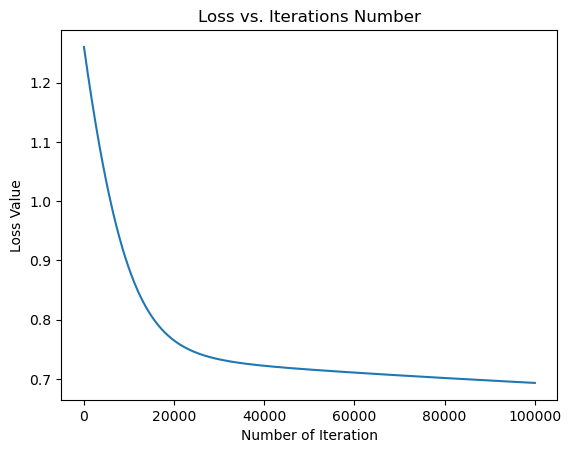

In [21]:
# Presenting the output
model = LogitRegression(learning_rate = 1e-4, iterations_num = 100000)
model.fit(X_train,y_train)
model.predict(X_train)
model.picklefile_save('Paul_Anip_logistic_regression.pk2')
model.plot_loss_graph()

Iteration : 0
Loss = 0.9891602821595054
Accuracy = 47.63636363636364%
Iteration : 10000
Loss = 0.9580228180637108
Accuracy = 47.63636363636364%
Iteration : 20000
Loss = 0.9300914243538596
Accuracy = 47.63636363636364%
Iteration : 30000
Loss = 0.9051739592514872
Accuracy = 47.63636363636364%
Iteration : 40000
Loss = 0.8830566820422492
Accuracy = 47.63636363636364%
Iteration : 50000
Loss = 0.8635127984683022
Accuracy = 47.63636363636364%
Iteration : 60000
Loss = 0.8463103854455206
Accuracy = 47.63636363636364%
Iteration : 70000
Loss = 0.8312192532108932
Accuracy = 47.63636363636364%
Iteration : 80000
Loss = 0.8180164992027056
Accuracy = 47.63636363636364%
Iteration : 90000
Loss = 0.8064906838527108
Accuracy = 47.63636363636364%


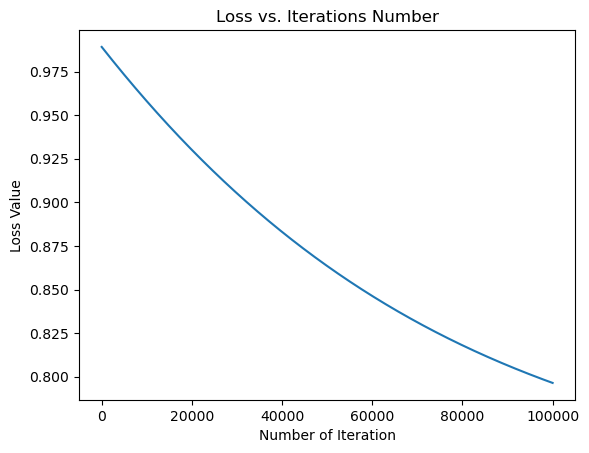

In [22]:
# Presenting the output
model = LogitRegression(learning_rate = 1e-5, iterations_num = 100000)
model.fit(X_train,y_train)
model.predict(X_train)
model.picklefile_save('Paul_Anip_logistic_regression.pk3')
model.plot_loss_graph()

Iteration : 0
Loss = 1.3117656905614536
Accuracy = 47.63636363636364%
Iteration : 10000
Loss = 1.3061134853625072
Accuracy = 47.63636363636364%
Iteration : 20000
Loss = 1.3004906582340088
Accuracy = 47.63636363636364%
Iteration : 30000
Loss = 1.2948973542575732
Accuracy = 47.63636363636364%
Iteration : 40000
Loss = 1.2893337164581644
Accuracy = 47.63636363636364%
Iteration : 50000
Loss = 1.2837998857421549
Accuracy = 47.63636363636364%
Iteration : 60000
Loss = 1.2782960008355584
Accuracy = 47.63636363636364%
Iteration : 70000
Loss = 1.2728221982224013
Accuracy = 47.63636363636364%
Iteration : 80000
Loss = 1.267378612083391
Accuracy = 47.63636363636364%
Iteration : 90000
Loss = 1.2619653742348411
Accuracy = 47.63636363636364%


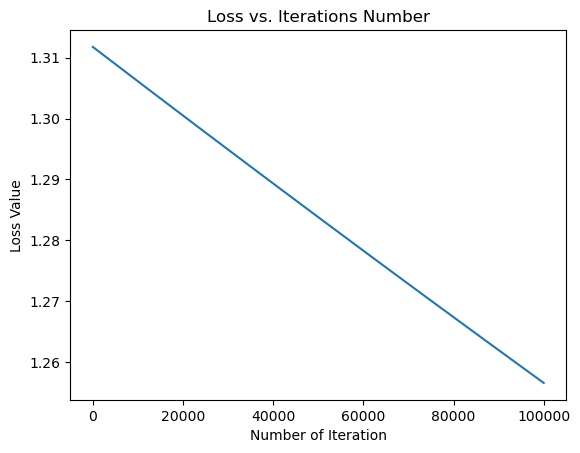

In [23]:
# Presenting the output
model = LogitRegression(learning_rate = 1e-6, iterations_num = 100000)
model.fit(X_train,y_train)
model.predict(X_train)
model.picklefile_save('Paul_Anip_logistic_regression.pk4')
model.plot_loss_graph()

Iteration : 0
Loss = 1.2808623377469028
Accuracy = 47.63636363636364%
Iteration : 10000
Loss = 0.6797640944092105
Accuracy = 57.45454545454546%
Iteration : 20000
Loss = 0.6496470505507619
Accuracy = 61.45454545454545%
Iteration : 30000
Loss = 0.6233602673482099
Accuracy = 69.45454545454545%
Iteration : 40000
Loss = 0.5999055692842805
Accuracy = 75.27272727272727%


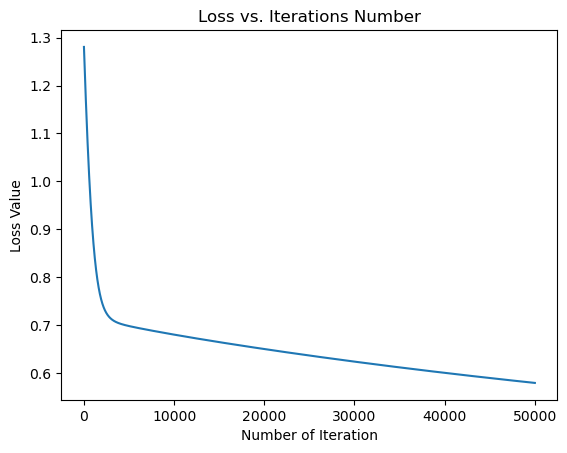

In [24]:
# Presenting the output
model = LogitRegression(learning_rate = 1e-3, iterations_num = 50000)
model.fit(X_train,y_train)
model.predict(X_train)
model.picklefile_save('Paul_Anip_logistic_regression.pk5')
model.plot_loss_graph()

Iteration : 0
Loss = 1.0913133829381314
Accuracy = 47.63636363636364%
Iteration : 10000
Loss = 0.8103127276290661
Accuracy = 46.909090909090914%
Iteration : 20000
Loss = 0.7241328602370274
Accuracy = 50.90909090909091%
Iteration : 30000
Loss = 0.6998963536040574
Accuracy = 49.81818181818182%
Iteration : 40000
Loss = 0.6902924535744903
Accuracy = 49.81818181818182%


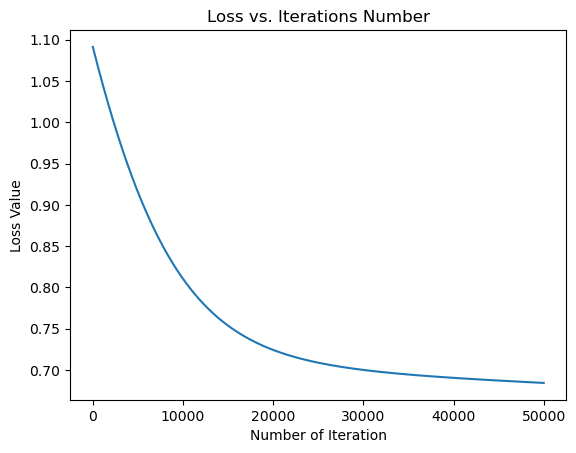

In [25]:
# Presenting the output
model = LogitRegression(learning_rate = 1e-4, iterations_num = 50000)
model.fit(X_train,y_train)
model.predict(X_train)
model.picklefile_save('Paul_Anip_logistic_regression.pk6')
model.plot_loss_graph()

Iteration : 0
Loss = 1.2333680480154696
Accuracy = 47.63636363636364%
Iteration : 10000
Loss = 1.1818630995659536
Accuracy = 47.63636363636364%
Iteration : 20000
Loss = 1.1337966835521807
Accuracy = 47.63636363636364%
Iteration : 30000
Loss = 1.089232153262823
Accuracy = 47.63636363636364%
Iteration : 40000
Loss = 1.0481877636536223
Accuracy = 47.63636363636364%


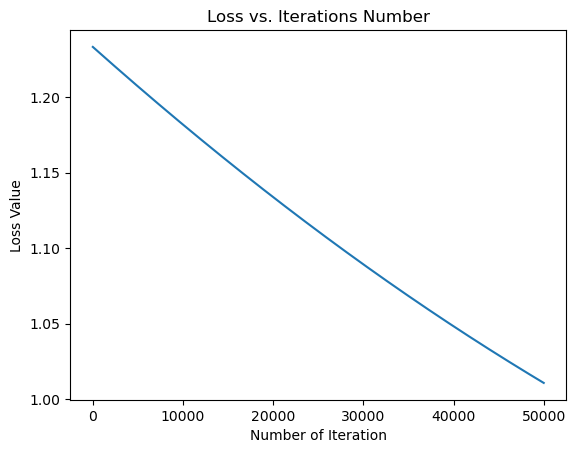

In [26]:
# Presenting the output
model = LogitRegression(learning_rate = 1e-5, iterations_num = 50000)
model.fit(X_train,y_train)
model.predict(X_train)
model.picklefile_save('Paul_Anip_logistic_regression.pk7')
model.plot_loss_graph()